<a href="https://colab.research.google.com/github/farisikhhaq/PCVK_2022/blob/master/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Tugas Nomor 2B
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image as im
from skimage import io

In [ ]:
def convolution2d(image, kernel, stride, padding):

  # add paddinng
  image = np.pad(image, padding, mode='constant', constant_values=0)

  # pick img input width and height values including insertion pad
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape
  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

  """
  Luas Untuk Mencari ukuran konvusional:
    [W-K+2SP/S]+1
  W = gambar (width/height)
  K = kernel size
  P = padding size
  S = stride value


  """

In [ ]:
#Tugas Nomor 2D
img = cv.imread('/content/drive/MyDrive/PCVK_MM/image/kitten01.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [ ]:
# image sharpen
kernal_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
# emboss
kernal_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])


# left sobel edge detection
kernal_sobel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])


# canny edge detection
kernal_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

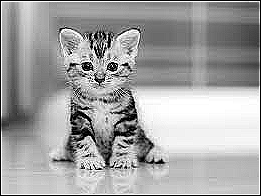

In [ ]:
cv2_imshow(convolution2d(img_gray,kernal_sharpen,1,2))

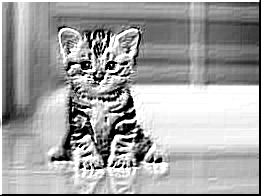

In [ ]:
cv2_imshow(convolution2d(img_gray,kernal_emboss,1,2))

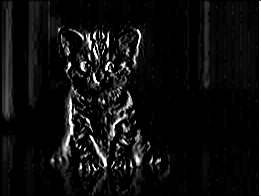

In [ ]:
cv2_imshow(convolution2d(img_gray,kernal_sobel,1,2))

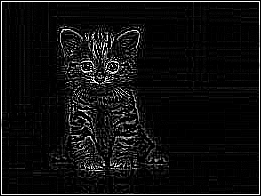

In [ ]:
cv2_imshow(convolution2d(img_gray,kernal_canny,1,2))

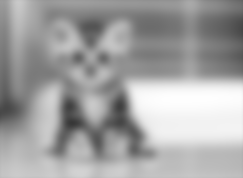

In [ ]:
# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray,gauss_kernel,1,2))